In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import imread
%matplotlib inline

In [5]:
im = imread('Broadway_tower_edit.jpg')
#im = imread('HJoceanSmall.jpg')

(-0.5, 1427.5, 967.5, -0.5)

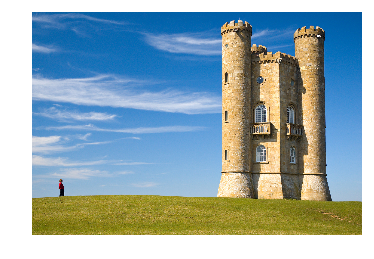

In [6]:
plt.imshow(im); plt.axis('off')

In [7]:
def calc_energy(im):
    slice_x1 = im[1:-1, 2:, :]
    slice_x2 = im[1:-1, :-2, :]
    slice_y1 = im[2:, 1:-1, :]
    slice_y2 = im[:-2, 1:-1, :]

    energy = np.zeros(im.shape[:2], dtype=np.float64)

    energy[1:-1, 1:-1] = np.sqrt(np.sum((slice_x1 - slice_x2)**2, axis=2) + np.sum((slice_y1 - slice_y2)**2, axis=2))

    ENERGY_BORDER = np.NaN
    energy[0, :] = ENERGY_BORDER
    energy[-1, :] = ENERGY_BORDER
    energy[:, 0] = ENERGY_BORDER
    energy[:, -1] = ENERGY_BORDER
    
    return energy

In [17]:
def get_seam_path(energy):
    seam_energy = np.zeros(energy.shape)

    seam_energy[0, 0] = energy[0, 0]
    seam_energy[0, -1] = energy[0, -1]

    for i in xrange(1, energy.shape[0]-1):
        seam_energy[i, 1:-1] = np.fmin(np.fmin(seam_energy[i-1, :-2], seam_energy[i-1, 1:-1]), seam_energy[i-1, 2:]) + energy[i, 1:-1]
        seam_energy[i, 0] = seam_energy[i-1, 0] + energy[i, 0]
        seam_energy[i, -1] = seam_energy[i-1, 0] + energy[i, -1]

    (m, n) = seam_energy.shape
    path = np.zeros(m, np.int)
    col = np.nanargmin(seam_energy[-2])
    path[-1] = path[-2] = col

    for i in range(m-3, 0, -1):
        tgt_energy = seam_energy[i+1, col] - energy[i+1, col]
        tgt_idx = np.nanargmin(seam_energy[i, col-1:col+2] - tgt_energy)
        path[i] = col = col + tgt_idx - 1

    path[0] = path[1]
    
    return path

In [37]:
#def remove_seam(im, path_x, path_y):
#    mask = np.ones(im.shape, dtype=bool)
#    mask[path_y, path_x] = False
#    return im[mask]

In [65]:
def remove_seam(img, seam, _):
    (m, n, _) = img.shape
    return np.array([np.delete(img[row], seam[row], axis=0) for row in xrange(m)])

(968, 1360, 3)


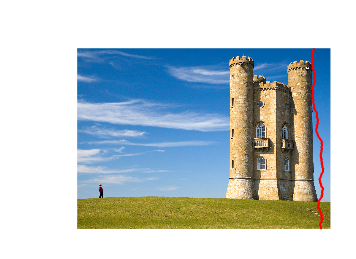

In [68]:
energy = calc_energy(im)
path_x = get_seam_path(energy)
path_y = np.arange(len(path_x))
im = remove_seam(im, path_x, path_y)
plt.imshow(im); plt.axis('off');
print(im.shape)
plt.plot(path_x, path_y, color='red')

(968, 1372, 3)
(968, 1371, 3)
(968, 1370, 3)
(968, 1369, 3)
(968, 1368, 3)
(968, 1367, 3)
(968, 1366, 3)
(968, 1365, 3)
(968, 1364, 3)
(968, 1363, 3)


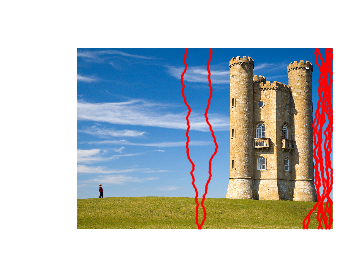

In [64]:
for i in range(10):
    energy = calc_energy(im)
    path_x = get_seam_path(energy)
    path_y = np.arange(len(path_x))
    im = remove_seam(im, path_x, path_y)
    plt.imshow(im); plt.axis('off');
    print(im.shape)
    plt.plot(path_x, path_y, color='red')